In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt

from tqdm import tqdm
from IPython.display import display

#from brokenaxes import brokenaxes
from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('file:///C:/Users/Md%20Asif%20Ikbal/Downloads/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.shape

(200000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [6]:
df.corr().describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,7.0,0.143325,0.377759,-0.000341,0.000250,0.000271,0.001423,1.0
fare_amount,7.0,0.144384,0.377395,-0.011014,-0.003946,0.008986,0.010304,1.0
pickup_longitude,7.0,0.025788,0.715572,-0.846324,-0.408438,0.000230,0.421742,1.0
pickup_latitude,7.0,0.014391,0.678091,-0.816461,-0.391634,-0.001560,0.351013,1.0
dropoff_longitude,7.0,0.021502,0.722493,-0.917010,-0.387377,0.000270,0.421006,1.0
dropoff_latitude,7.0,-0.010339,0.712959,-0.917010,-0.428669,-0.000659,0.351319,1.0
passenger_count,7.0,0.144258,0.377368,-0.001560,-0.000537,0.000033,0.006204,1.0


In [7]:
df.drop(['Unnamed: 0','key'], axis=1, inplace=True)
display(df.head())

target = 'fare_amount'
features = [i for i in df.columns if i not in [target]]

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5



Inference: The Datset consists of 7 features & 200000 samples.


In [8]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [12]:
!pip install geopy

  Using cached geopy-2.2.0-py3-none-any.whl (118 kB)
  Using cached geographiclib-1.52-py3-none-any.whl (38 kB)


In [14]:
import geopy.distance

In [15]:
df = df[(df.pickup_latitude<90) & (df.dropoff_latitude<90) &
        (df.pickup_latitude>-90) & (df.dropoff_latitude>-90) &
        (df.pickup_longitude<180) & (df.dropoff_longitude<180) &
        (df.pickup_longitude>-180) & (df.dropoff_longitude>-180)]

df.pickup_datetime=pd.to_datetime(df.pickup_datetime)

df['year'] = df.pickup_datetime.dt.year
df['month'] = df.pickup_datetime.dt.month
df['weekday'] = df.pickup_datetime.dt.weekday
df['hour'] = df.pickup_datetime.dt.hour

df['Monthly_Quarter'] = df.month.map({1:'Q1',2:'Q1',3:'Q1',4:'Q2',5:'Q2',6:'Q2',7:'Q3',
                                      8:'Q3',9:'Q3',10:'Q4',11:'Q4',12:'Q4'})
df['Hourly_Segments'] = df.hour.map({0:'H1',1:'H1',2:'H1',3:'H1',4:'H2',5:'H2',6:'H2',7:'H2',8:'H3',
                                     9:'H3',10:'H3',11:'H3',12:'H4',13:'H4',14:'H4',15:'H4',16:'H5',
                                     17:'H5',18:'H5',19:'H5',20:'H6',21:'H6',22:'H6',23:'H6'})

df['Distance']=[round(geopy.distance.distance((df.pickup_latitude[i], df.pickup_longitude[i]),(df.dropoff_latitude[i], df.dropoff_longitude[i])).m,2) for i in df.index]

df.drop(['pickup_datetime','month', 'hour',], axis=1, inplace=True)

original_df = df.copy(deep=True)

df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,weekday,Monthly_Quarter,Hourly_Segments,Distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,Q2,H5,1681.11
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,4,Q3,H6,2454.36
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,0,Q3,H6,5039.60
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,4,Q2,H3,1661.44
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,3,Q3,H5,4483.73


In [17]:
#Checking number of unique rows in each feature

df.nunique().sort_values()

Monthly_Quarter           4
Hourly_Segments           6
year                      7
weekday                   7
passenger_count           8
fare_amount            1244
pickup_longitude      71055
dropoff_longitude     76890
pickup_latitude       83831
dropoff_latitude      90582
Distance             164542
dtype: int64

In [18]:
#Checking number of unique rows in each feature

nu = df.drop([target], axis=1).nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df.drop([target], axis=1).shape[1]):
    if nu.values[i]<=24:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 5 numerical & 5 categorical features.


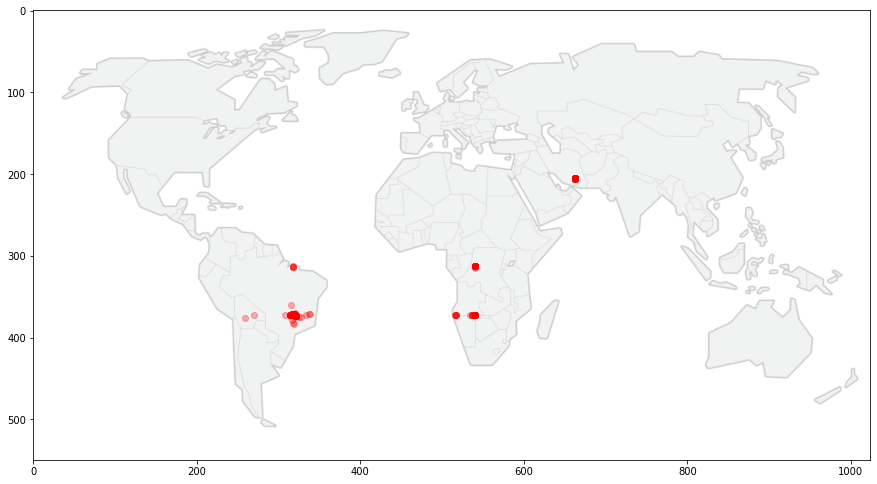

In [19]:
plt.figure(figsize=[15,10])
a=plt.imread('https://raw.githubusercontent.com/Masterx-AI/Project_Uber_Fare_Prediction/main/wm.png')
plt.imshow(a, alpha=0.2)
plt.scatter( (df.pickup_longitude+180)*3,(df.pickup_latitude+215)*1.45555555,alpha=0.3, color='red')
#mdf.plot(kind='scatter',x='pickup_latitude',y='pickup_longitude',alpha=0.1)
plt.show()

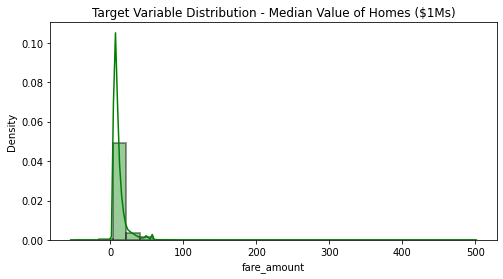

In [20]:
#Let us first analyze the distribution of the target variable

plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

                               Visualising Categorical Features:                                


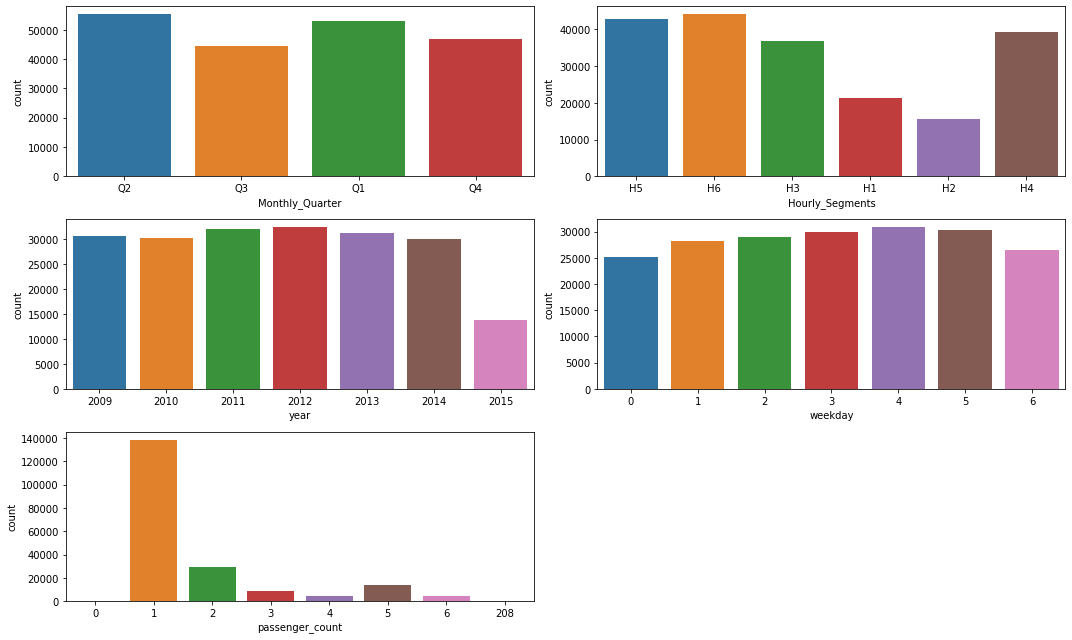

In [21]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

# for i in range(len(cf)):
#     if df[cf[i]].nunique()<=4:
#         plt.subplot(math.ceil(len(cf)/n),n,i+1)
#         sns.countplot(df[cf[i]])
#     else:
#         plt.subplot(math.ceil(len(cf)/2),2,i)
#         sns.countplot(df[cf[i]])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=12:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(3,1,i-3)
        sns.countplot(df[cf[i]])
        #plt.subplot(4,2,8)
        #sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

                                 Numeric Features Distribution                                  


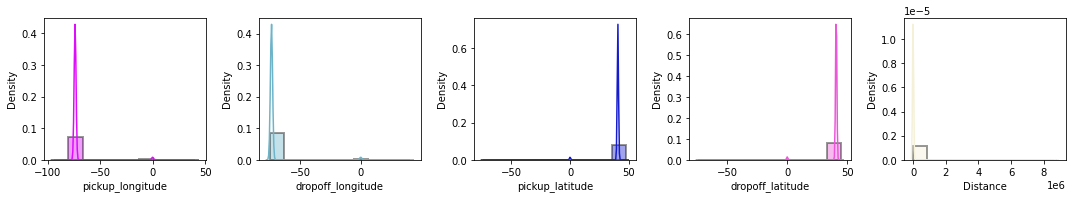

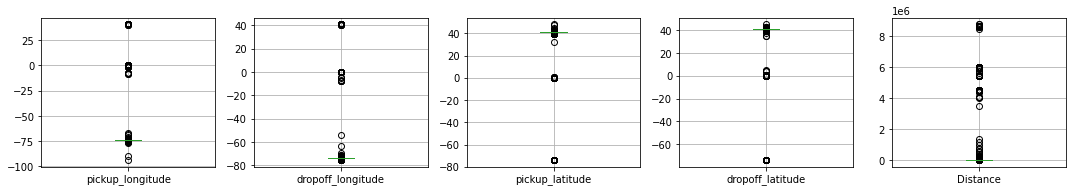

In [22]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(100))

n=5

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,5*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

In [23]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = original_df.shape

df.drop_duplicates(inplace=True)
df.drop(['pickup_latitude','pickup_longitude',
         'dropoff_latitude','dropoff_longitude'],axis=1)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 109


In [30]:
#Converting categorical Columns to Numeric

df1 = df.copy()
df3 = df1.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape


Dummy Encoding on features:
Monthly_Quarter
Hourly_Segments
year
weekday
passenger_count


(163203, 33)

In [31]:
df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,...,weekday_4,weekday_5,weekday_6,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1681.11,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,7.7,-73.994355,40.728225,-73.994710,40.750325,2454.36,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
2,12.9,-74.005043,40.740770,-73.962565,40.772647,5039.60,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,1661.44,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,4.9,-73.969019,40.755910,-73.969019,40.755910,0.00,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 163203 samples.
After removal of outliers, The dataset now has 157075 samples.


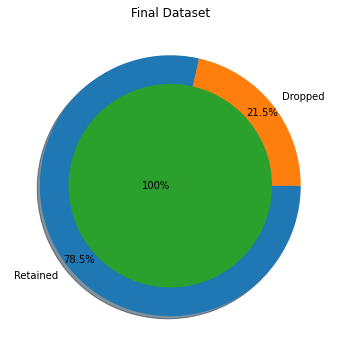


Inference: After the cleanup process, 42912 samples were dropped, while retaining 21.46% of the data.


In [32]:
#Final Dataset size after performing Preprocessing

df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

In [33]:
#Splitting the data intro training & testing sets

m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (157075, 32) (157075,) 
Training set  --->  (125660, 32) (125660,) 
Testing set   --->  (31415, 32)  (31415,)


In [34]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)
df.dropna(inplace=True)

                     Total Null Values  Percentage
fare_amount                          0         0.0
passenger_count_5                    0         0.0
passenger_count_4                    0         0.0
passenger_count_3                    0         0.0
passenger_count_2                    0         0.0
passenger_count_1                    0         0.0
weekday_6                            0         0.0
weekday_5                            0         0.0
weekday_4                            0         0.0
weekday_3                            0         0.0
weekday_2                            0         0.0
weekday_1                            0         0.0
year_2015                            0         0.0
year_2014                            0         0.0
year_2013                            0         0.0
passenger_count_6                    0         0.0
year_2012                            0         0.0
year_2010                            0         0.0
Hourly_Segments_H6             

                                       Correlation Matrix                                       


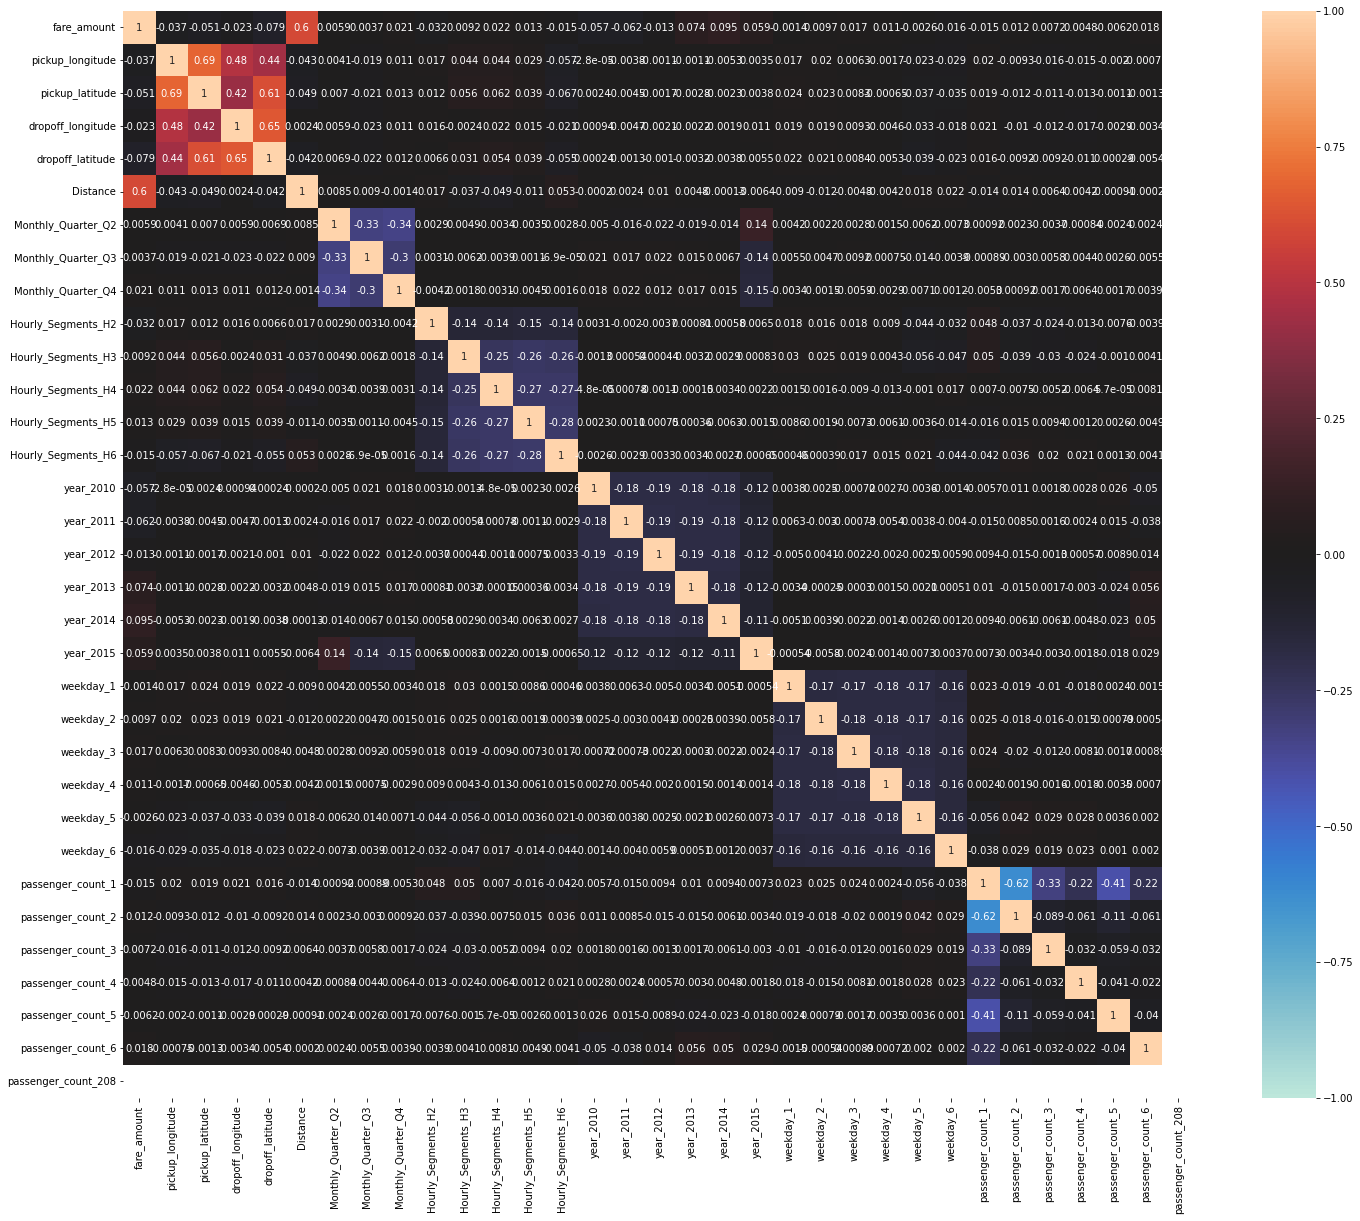

In [35]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[24,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [36]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     2812.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        08:09:48   Log-Likelihood:            -3.2669e+05
No. Observations:              125660   AIC:                         6.535e+05
Df Residuals:                  125628   BIC:                         6.538e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             977.6544     93.990     10.402      0.000     793.435    1161.874
pickup_longitude        0.4835      0.860      0.562      0.574      -1.202       2.168
pickup_latitude         1.3191      0.718      1.837      0.066      -0.088       2.727
dropoff_longitude       4.7005      0.796      5.902      0.000       3.139       6.262
dropoff_latitude      -15.8505      0.667    -23.756      0.000     -17.158     -14.543
Distance                0.0021   7.45e-06    280.042      0.000       0.002       0.002
Monthly_Quarter_Q2      0.1858      0.025      7.447      0.000       0.137       0.235
Monthly_Quarter_Q3      0.3119      0.027     11.623      0.000       0.259       0.365
Monthly_Quarter_Q4      0.4910      0.026     18.608      0.000       0.439       0.543
Hourly_Segments_H2     -0.1201      0.047     -2.568      0.010      -0.212      -0.028
Hourly_Segments_H3      0.8297      0.038     21.896      0.000       0.755       0.904
Hourly_Segments_H4      1.0082      0.037     27.056      0.000       0.935       1.081
Hourly_Segments_H5      0.7224      0.037     19.644      0.000       0.650       0.794
Hourly_Segments_H6      0.1060      0.037      2.886      0.004       0.034       0.178
year_2010               0.1358      0.033      4.110      0.000       0.071       0.201
year_2011               0.1118      0.033      3.408      0.001       0.048       0.176
year_2012               0.5445      0.033     16.649      0.000       0.480       0.609
year_2013               1.4454      0.033     43.694      0.000       1.381       1.510
year_2014               1.6886      0.033     50.515      0.000       1.623       1.754
year_2015               1.8358      0.043     42.573      0.000       1.751       1.920
weekday_1               0.2276      0.035      6.414      0.000       0.158       0.297
weekday_2               0.3495      0.035      9.888      0.000       0.280       0.419
weekday_3               0.3737      0.035     10.636      0.000       0.305       0.443
weekday_4               0.3353      0.035      9.592      0.000       0.267       0.404
weekday_5               0.0346      0.035      0.976      0.329      -0.035       0.104
weekday_6              -0.1338      0.037     -3.600      0.000      -0.207      -0.061
passenger_count_1       0.3074      0.155      1.986      0.047       0.004       0.611
passenger_count_2       0.4418      0.156      2.827      0.005       0.135       0.748
passenger_count_3       0.4975      0.160      3.101      0.002       0.183       0.812
passenger_count_4       0.5299      0.167      3.180      0.001       0.203       0.856
passenger_count_5       0.3896      0.158      2.462      0.014       0.079       0.700
passenger_count_6       0.3835      0.167      2.297      0.022       0.056       0.711
pas

In [39]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(100))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(100))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                               Standardardization on Training set                               


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,Hourly_Segments_H3,...,weekday_4,weekday_5,weekday_6,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
count,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,...,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,1.256600e+05,125660.0
mean,4.360944e-13,1.148163e-14,-5.175977e-13,4.018159e-13,3.606661e-16,-3.749737e-16,2.978898e-15,-4.078652e-16,3.631028e-16,3.934871e-15,...,6.452271e-15,2.899431e-15,4.241704e-16,-5.397702e-16,-1.170074e-15,-1.208516e-15,-1.705477e-16,-2.233943e-15,-1.494822e-15,0.0
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,...,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,0.0
min,-2.708133e+00,-2.770073e+00,-2.658590e+00,-2.702013e+00,-1.688202e+00,-6.150153e-01,-5.330524e-01,-5.552515e-01,-2.760048e-01,-4.897070e-01,...,-4.287150e-01,-4.215513e-01,-3.786723e-01,-1.506797e+00,-4.117914e-01,-2.160918e-01,-1.486875e-01,-2.731726e-01,-1.483237e-01,0.0
25%,-6.789099e-01,-6.906902e-01,-6.716906e-01,-6.746896e-01,-7.688244e-01,-6.150153e-01,-5.330524e-01,-5.552515e-01,-2.760048e-01,-4.897070e-01,...,-4.287150e-01,-4.215513e-01,-3.786723e-01,-1.506797e+00,-4.117914e-01,-2.160918e-01,-1.486875e-01,-2.731726e-01,-1.483237e-01,0.0
50%,-5.486037e-02,3.710846e-02,-5.119046e-02,4.724697e-02,-2.196005e-01,-6.150153e-01,-5.330524e-01,-5.552515e-01,-2.760048e-01,-4.897070e-01,...,-4.287150e-01,-4.215513e-01,-3.786723e-01,6.636594e-01,-4.117914e-01,-2.160918e-01,-1.486875e-01,-2.731726e-01,-1.483237e-01,0.0
75%,6.479126e-01,6.611569e-01,6.224687e-01,6.444792e-01,5.942366e-01,1.625976e+00,-5.330524e-01,-5.552515e-01,-2.760048e-01,-4.897070e-01,...,-4.287150e-01,-4.215513e-01,-3.786723e-01,6.636594e-01,-4.117914e-01,-2.160918e-01,-1.486875e-01,-2.731726e-01,-1.483237e-01,0.0
max,2.700652e+00,2.725788e+00,2.642949e+00,2.666144e+00,2.787361e+00,1.625976e+00,1.875988e+00,1.800986e+00,3.623125e+00,2.042037e+00,...,2.332552e+00,2.372190e+00,2.640806e+00,6.636594e-01,2.428414e+00,4.627663e+00,6.725513e+00,3.660689e+00,6.742011e+00,0.0



                                Standardardization on Testing set                                


,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,Monthly_Quarter_Q2,Monthly_Quarter_Q3,Monthly_Quarter_Q4,Hourly_Segments_H2,Hourly_Segments_H3,...,weekday_4,weekday_5,weekday_6,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_208
count,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,...,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.000000,31415.0
mean,-0.007524,-0.001524,-0.004473,-0.004905,-0.007395,-0.006741,-0.002473,0.002550,-0.001086,-0.000927,...,0.003999,-0.006336,0.001658,-0.005199,0.004543,0.004703,-0.003829,0.003444,-0.004222,0.0
std,0.997951,0.996939,0.996820,0.994959,0.992869,0.996580,0.998351,1.001600,0.998196,0.999296,...,1.003808,0.993797,1.001888,1.002192,1.004576,1.010325,0.987336,1.005826,0.985989,0.0
min,-2.311010,-2.625758,-2.627758,-2.703109,-1.688202,-0.615015,-0.533052,-0.555251,-0.276005,-0.489707,...,-0.428715,-0.421551,-0.378672,-1.506797,-0.411791,-0.216092,-0.148688,-0.273173,-0.148324,0.0
25%,-0.693710,-0.694658,-0.670261,-0.675130,-0.770235,-0.615015,-0.533052,-0.555251,-0.276005,-0.489707,...,-0.428715,-0.421551,-0.378672,-1.506797,-0.411791,-0.216092,-0.148688,-0.273173,-0.148324,0.0
50%,-0.064166,0.027385,-0.057781,0.039504,-0.221831,-0.615015,-0.533052,-0.555251,-0.276005,-0.489707,...,-0.428715,-0.421551,-0.378672,0.663659,-0.411791,-0.216092,-0.148688,-0.273173,-0.148324,0.0
75%,0.643260,0.656271,0.614852,0.635593,0.573907,1.625976,-0.533052,-0.555251,-0.276005,-0.489707,...,-0.428715,-0.421551,-0.378672,0.663659,-0.411791,-0.216092,-0.148688,-0.273173,-0.148324,0.0
max,2.699368,2.726430,2.642638,2.664524,2.787095,1.625976,1.875988,1.800986,3.623125,2.042037,...,2.332552,2.372190,2.640806,0.663659,2.428414,4.627663,6.725513,3.660689,6.742011,0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [06:24<00:00, 12.40s/it]


Dropped Features -->  ['passenger_count_1', 'Hourly_Segments_H5', 'pickup_latitude', 'weekday_4', 'dropoff_longitude', 'year_2012', 'Monthly_Quarter_Q4', 'Hourly_Segments_H3', 'weekday_5', 'year_2010', 'pickup_longitude', 'weekday_1', 'year_2014', 'Monthly_Quarter_Q2', 'Hourly_Segments_H6']


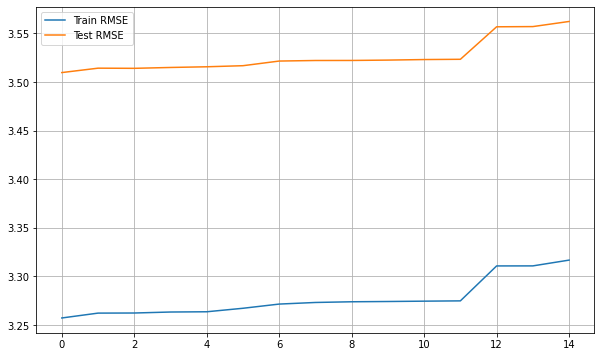

In [40]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]


DROP=[];b=[]

for i in tqdm(range(len(Train_X_std.columns)-1)):
    vif = pd.DataFrame()
    X = Train_X_std.drop(DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    if vif.loc[0][1]>=1.1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(Train_X_std.drop(DROP,axis=1), Train_Y)

        pred1 = LR.predict(Train_X_std.drop(DROP,axis=1))
        pred2 = LR.predict(Test_X_std.drop(DROP,axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
        Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))

       
        
print('Dropped Features --> ',DROP)


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')

plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [01:22<00:00,  2.67s/it]


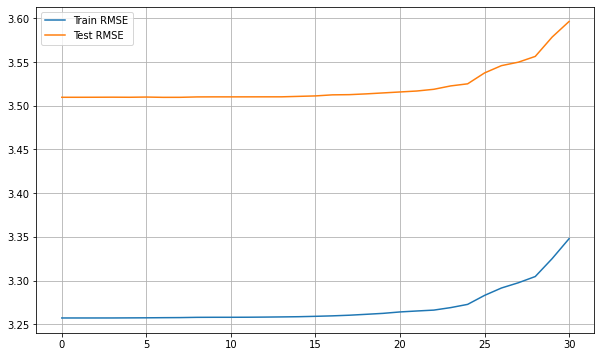

In [41]:
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in tqdm(range(m)):
    lm = LinearRegression()
   

    rfe = RFE(lm,n_features_to_select=Train_X_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(Train_X_std, Train_Y)
    
  
    LR = LinearRegression()
    LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)
    
    

    pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
    pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(Train_Y, pred1)))
    Tss.append(np.sqrt(mean_squared_error(Test_Y, pred2)))
        


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')

plt.legend()
plt.grid()
plt.show()

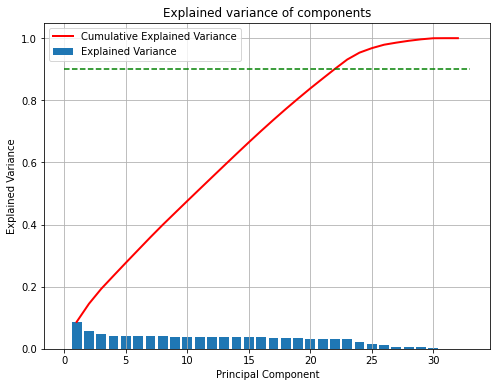

In [42]:
from sklearn.decomposition import PCA

pca = PCA().fit(Train_X_std)

fig, ax = plt.subplots(figsize=(8,6))
x_values = range(1, pca.n_components_+1)
ax.bar(x_values, pca.explained_variance_ratio_, lw=2, label='Explained Variance')
ax.plot(x_values, np.cumsum(pca.explained_variance_ratio_), lw=2, label='Cumulative Explained Variance', color='red')
plt.plot([0,pca.n_components_+1],[0.9,0.9],'g--')
ax.set_title('Explained variance of components')
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance')
plt.legend()
plt.grid()
plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:50<00:00,  1.72s/it]


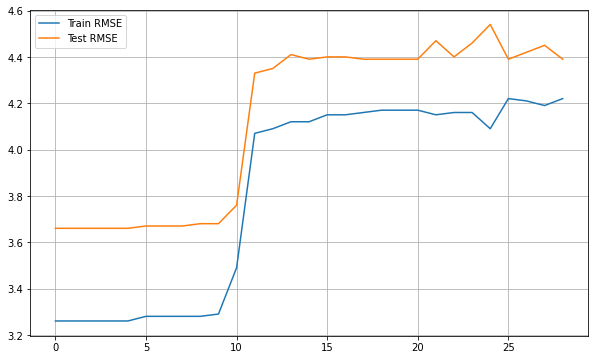

In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-4

for i in tqdm(range(m)):
    pca = PCA(n_components=Train_X_std.shape[1]-i)
    Train_X_std_pca = pca.fit_transform(Train_X_std)
    Test_X_std_pca = pca.fit_transform(Test_X_std)
    
    LR = LinearRegression()
    LR.fit(Train_X_std_pca, Train_Y)

    pred1 = LR.predict(Train_X_std_pca)
    pred2 = LR.predict(Test_X_std_pca)

    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))


plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')

plt.legend()
plt.grid()
plt.show()

In [44]:
#Shortlisting the selected Features (with RFE)

lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=df.shape[1]-23)           
rfe = rfe.fit(Train_X_std, Train_Y)

LR = LinearRegression()
LR.fit(Train_X_std.loc[:,rfe.support_], Train_Y)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(Train_X_std.loc[:,rfe.support_])
pred2 = LR.predict(Test_X_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(Train_Y, pred1)))
print(np.sqrt(mean_squared_error(Test_Y, pred2)))

Train_X_std = Train_X_std.loc[:,rfe.support_]
Test_X_std = Test_X_std.loc[:,rfe.support_]

3.266252224046425
3.5187502675775004


In [45]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>50].columns,3)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

<<<------------------------- Evaluating Multiple Linear Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.26235244  2.59043363  0.1382076   0.31790771  0.38780342  0.28503438
  0.16631525  0.49002287  0.56704246  0.42554912]
The Intercept of the Regresion Model was found to be  8.343185341397525


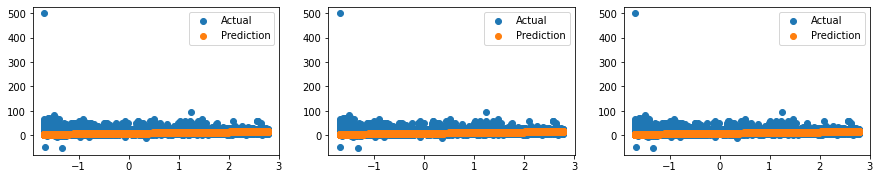



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.40636600103795795
Residual Sum of Squares (RSS) on Training set  ---> 1340591.5952561456
Mean Squared Error (MSE) on Training set       ---> 10.668403591088218
Root Mean Squared Error (RMSE) on Training set ---> 3.266252224046425

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.36111600707404246
Residual Sum of Squares (RSS) on Training set  ---> 388968.0722427929
Mean Squared Error (MSE) on Training set       ---> 12.38160344557673
Root Mean Squared Error (RMSE) on Training set ---> 3.5187502675775004

--------------------Residual Plots--------------------


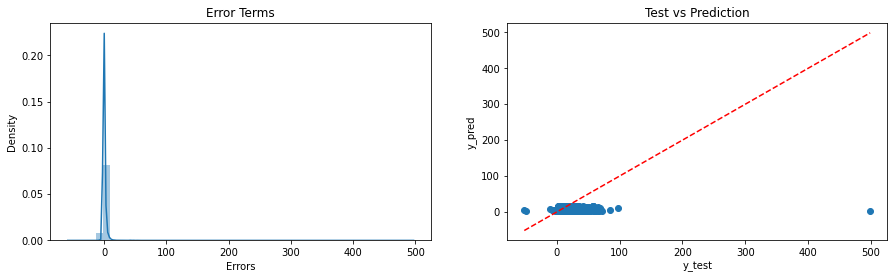

In [46]:
#Linear Regression

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

<<<------------------------- Evaluating Ridge Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.26235244  2.59043363  0.1382076   0.31790771  0.38780342  0.28503438
  0.16631525  0.49002287  0.56704246  0.42554912]
The Intercept of the Regresion Model was found to be  8.343185341397525


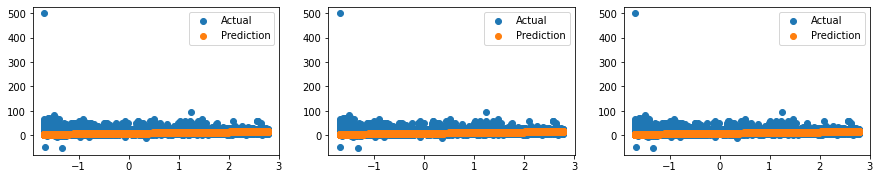



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.4063660010055381
Residual Sum of Squares (RSS) on Training set  ---> 1340591.5953293587
Mean Squared Error (MSE) on Training set       ---> 10.668403591670847
Root Mean Squared Error (RMSE) on Training set ---> 3.2662522241356142

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.36111610304489317
Residual Sum of Squares (RSS) on Training set  ---> 388968.0138134111
Mean Squared Error (MSE) on Training set       ---> 12.381601585656886
Root Mean Squared Error (RMSE) on Training set ---> 3.518750003290499

--------------------Residual Plots--------------------


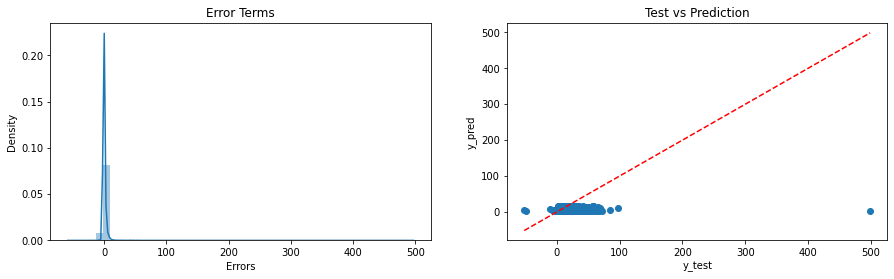

In [47]:
#Creating a Ridge Regression model

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

In [ ]:
#Creating a Ridge Regression model

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*25 ,'-'*25,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

<<<------------------------- Evaluating Lasso Regression Model ------------------------->>>

The Coeffecient of the Regresion Model was found to be  [-0.26235244  2.59043363  0.1382076   0.31790771  0.38780342  0.28503438
  0.16631525  0.49002287  0.56704246  0.42554912]
The Intercept of the Regresion Model was found to be  8.343185341397525
